## Pumpkin Pricing

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

- Only get pumpkins priced by the bushel
- Convert the date to a month
- Calculate the price to be an average of high and low prices
- Convert the price to reflect the pricing by bushel quantity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

columns_to_select = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


C:\Users\HELLO\AppData\Local\Temp\ipykernel_15388\2637987050.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


A basic scatterplot reminds us that we only have month data from August through December. We probably need more data to be able to draw conclusions in a linear fashion.

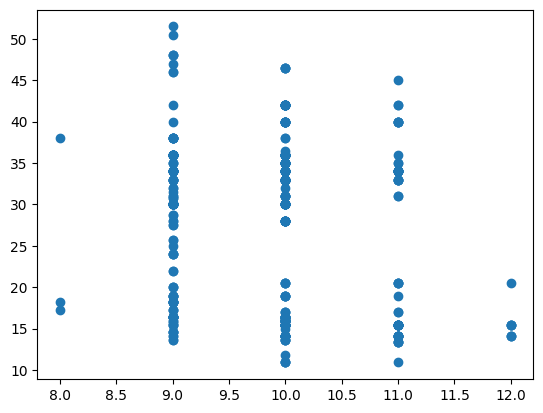

In [3]:
import matplotlib.pyplot as plt
plt.scatter('Month','Price',data=new_pumpkins)

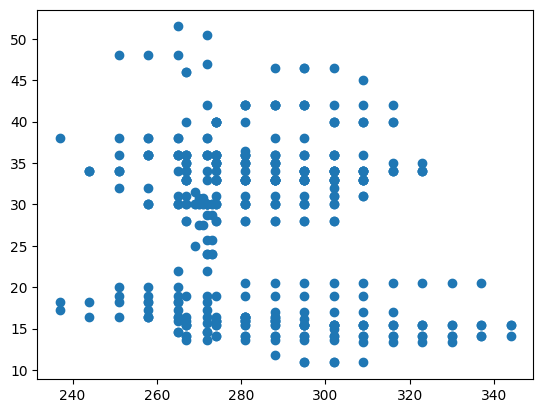

In [4]:

plt.scatter('DayOfYear','Price',data=new_pumpkins)

In [5]:
new_pumpkins.groupby('Variety')['Price'].mean()

Variety
FAIRYTALE                   31.000000
MINIATURE                   34.127342
MIXED HEIRLOOM VARIETIES    18.181818
PIE TYPE                    15.997790
Name: Price, dtype: float64

In [6]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety'] == 'PIE TYPE']

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [8]:
# Get the day of yrar and pice in separate arrays
x = pie_pumpkins["DayOfYear"].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

x.shape

(144, 1)

In [9]:
#split data into train and test set
x_train,x_text,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [10]:
#create a linear Regression object
lin_reg = LinearRegression()

#train model using training data
lin_reg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
#test model using our data
pred = lin_reg.predict(x_text)
pred

array([16.21096253, 16.73652536, 16.08833121, 15.35254325, 15.96569988,
       16.73652536, 16.21096253, 16.36863138, 16.61389403, 15.84306855,
       15.84306855, 15.72043723, 16.21096253, 15.5978059 , 16.45622519,
       15.72043723, 15.5978059 , 16.08833121, 15.72043723, 16.36863138,
       16.85915669, 16.21096253, 15.22991192, 16.21096253, 15.84306855,
       16.45622519, 16.08833121, 15.84306855, 15.5978059 ])

In [12]:
#caluculate the mean swuare error
mse = np.sqrt(mean_squared_error(y_test,pred))

#format the mse in a easy to read format
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 2.77 (17.2%)


In [13]:
#calculate the coefficien of determination
score = lin_reg.score(x_train,y_train)
print('Model Determination:', score)

Model Determination: 0.04460606335028361


In [14]:
lin_reg.predict([[256]])

array([16.64893156])

Mean error: 2.73 17.0%)


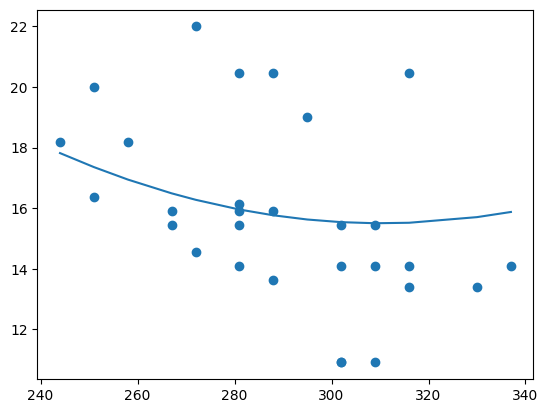

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#build a polynimail regression pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

#use the pipeline to build the model 
pipeline.fit(x_train,y_train)

#test the model with model data
pred = pipeline.predict(x_text)


#calculate mse
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} {mse/np.mean(pred)*100:3.3}%)')

#plot the results
plt.scatter(x_text,y_test)
plt.plot(sorted(x_text), pipeline.predict(sorted(x_text)))

In [16]:
#score the model
score = pipeline.score(x_train,y_train)
print(f'Determination model: {score}')

Determination model: 0.07639977655280128


In [28]:
#covert the variety into a categorical feature
X =  pd.get_dummies(new_pumpkins['Variety']) \
    .join(new_pumpkins['Month']) \
    .join(pd.get_dummies(new_pumpkins['City'])) \
    .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

In [29]:
#make train split test
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

#Create a linear regression object 
lin_reg = LinearRegression()

#train the model using our training data
lin_reg.fit(X_train,y_train)

#test the model using out test data
pred = lin_reg.predict(X_test)

#calculate the mean square error
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f"Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)")

#calculate the coefficient of determination
score = lin_reg.score(X_train,y_train)
print("Model determination: ", score)

Mean error: 2.84 (10.5%)
Model determination:  0.9401401953107826
